## IANNwTF Homework 02 - Multi-Layer Perceptron
- Group #7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Building the data set + Plotting
- we're using a static seed throughout the notebook (variable `rng`) to have reproducible results

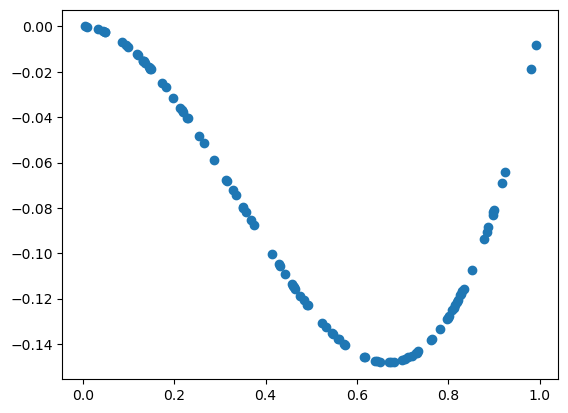

In [2]:
rng = np.random.default_rng(694201337)

x = rng.random(100)
f = lambda x: np.array([x**3 - x**2], dtype=np.float32)
t = [f(xi) for xi in x]
plt.plot(x, t, 'o')

### 2.2 Perceptrons

- the activation function ReLU is its own class, so that it can be stacked ontop of other layers in the MLP
- each layer/activation function stores its input as it is needed for calculating the local gradient during backpropagation
- the weights get updated during the call of backward_step, hence the Layer also needs to be constructed with an eta (learning rate)

In [3]:
class Layer:
    def __init__(self, n_in, n_out, eta = 0.04, rng = np.random):
        self.weights = rng.uniform(-1, 1, (n_in, n_out))
        self.biases = np.zeros((n_out))
        self.eta = eta
  
    def forward_step(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.biases

    def backward_step(self, grad):
        newgrad = np.dot(grad, self.weights.T)
        self.weights -= self.eta * np.dot(self.input.T, grad)
        self.biases -= self.eta * grad.squeeze()

        return newgrad

class ReLU:
    def forward_step(self, input):
        self.input = input
        return np.maximum(np.zeros_like(input), input)
      
    def backward_step(self, grad):
        return (self.input > 0) * grad

### 2.3 Multi-Layer Perceptron

In [4]:
class MLP:
    def __init__(self, layers):
        self.layers = layers

    def forward_step(self, input):
        for layer in self.layers:
            input = layer.forward_step(input)
        return input

    def backpropagation(self, grad):
        for layer in reversed(self.layers):
            grad = layer.backward_step(grad)
        return grad

### 2.4 Training
- error function returns a tuple of form (forward, backward/derivative)

In [5]:
def MeanSquaredError(y_pred, y_true): # works only if y is a scalar atm
    result = 1/2 * (y_pred - y_true)**2
    derivative = y_pred - y_true
    return result, derivative

def StochasticGradientDescent(epochs, mlp, x_train, y_train, error_function):
    loss_accumulator = []
    for epoch in range(epochs + 1):
        loss_accumulator.append(0)
        for x, y in zip(x_train, y_train):
            y_prediction = mlp.forward_step(x)
            loss, grad = error_function(y_prediction, y)
            mlp.backpropagation(grad)
            loss_accumulator[epoch] += loss.squeeze()
            
        loss_accumulator[epoch] /= len(x_train) # average loss over all samples
        if epoch % 1000 == 0:
            print(f"Epoch {epoch:>5}, loss: {loss_accumulator[epoch]}")
        
            
    return loss_accumulator

In [6]:
eta = 0.002
epochs = 10000

rng = np.random.default_rng(69420)

n = MLP([Layer(1, 10, eta=eta, rng=rng), ReLU(), 
         Layer(10, 1, eta=eta, rng=rng)])

loss_list = StochasticGradientDescent(epochs, n, x, t, MeanSquaredError)

Epoch     0, loss: 0.2028189102194895
Epoch  1000, loss: 3.770661784688392e-05
Epoch  2000, loss: 2.328277287739844e-05
Epoch  3000, loss: 1.5464927349464624e-05
Epoch  4000, loss: 1.0221454467961307e-05
Epoch  5000, loss: 7.554044069916443e-06
Epoch  6000, loss: 6.4404235818910635e-06
Epoch  7000, loss: 5.905453088728422e-06
Epoch  8000, loss: 5.531234039352308e-06
Epoch  9000, loss: 5.145786537502178e-06
Epoch 10000, loss: 4.9081647540915665e-06


### 2.5 Visualization

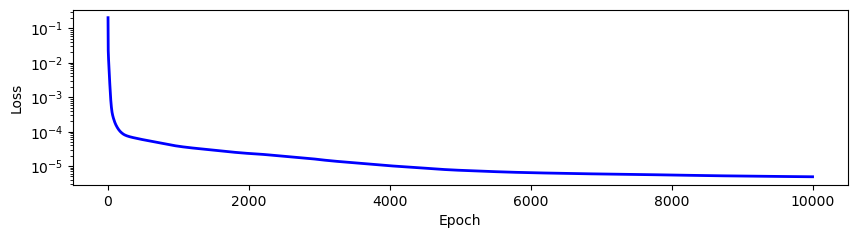

In [7]:
def plot_loss(loss_list):
  fig = plt.figure(figsize=(10, 5))
  ax = fig.add_subplot(2, 1, 1)
  line, = ax.plot(loss_list, color='blue', lw=2)
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.set_yscale('log')
  
plot_loss(loss_list)

- The loss is fairly low but when we plot the graph through the model it doesn't look great

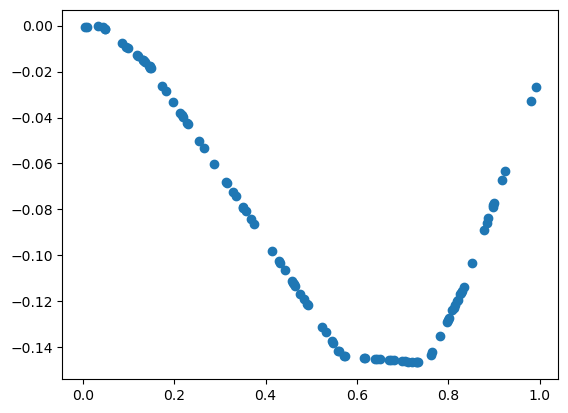

In [8]:
tn = [n.forward_step(np.array([xi])) for xi in x]
plt.plot(x, tn, 'o')

### Extra
- using a different activation function might do the help.

Epoch     0, loss: 0.0008188501666922938
Epoch  1000, loss: 0.00011204609886642788
Epoch  2000, loss: 2.7561775029910325e-05
Epoch  3000, loss: 5.86987722390143e-06
Epoch  4000, loss: 5.082600250383632e-06
Epoch  5000, loss: 4.736133921257877e-06
Epoch  6000, loss: 4.424748268301745e-06
Epoch  7000, loss: 4.1377701619708015e-06
Epoch  8000, loss: 3.871087166334009e-06
Epoch  9000, loss: 3.6218702795396903e-06
Epoch 10000, loss: 3.388095240348764e-06


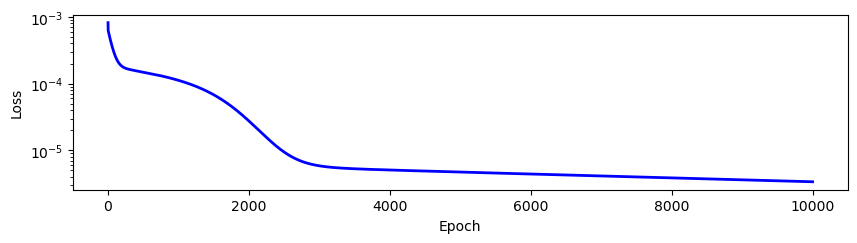

In [9]:
class Tanh:
    def forward_step(self, input):
        self.input = input
        return np.tanh(input)
    
    def backward_step(self, grad):
        return (1 - np.tanh(self.input)**2) * grad
    
rng = np.random.default_rng(694201337)

eta = 0.05
epochs = 10000

n_tanh = MLP([Layer(1, 10, eta, rng), Tanh(), 
              Layer(10, 1, eta, rng)])

loss_list = StochasticGradientDescent(epochs, n_tanh, x, t, MeanSquaredError)
plot_loss(loss_list)

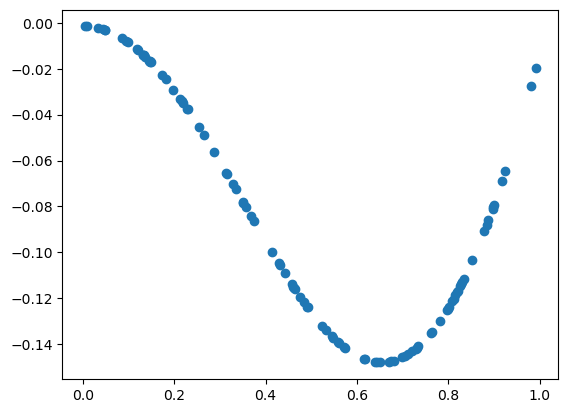

In [10]:
tn = [n_tanh.forward_step(np.array([xi])) for xi in x]
plt.plot(x, tn, 'o')